In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'retina'

# Different Distributions

In this section we will look at different distributions and plot them out. Additionally, we will consider what types of processes might have generated each of these distributions. 

The module `stats` in `scipy` has many useful distributions, below import from this module each of the following distributions:
* `uniform`
* `norm`
* `bernoulli`
* `poisson`

In [5]:
# Delete this
from scipy.stats import uniform, norm, bernoulli, poisson

Each of these distributions are represented as `classes` by `scipy`, in order generate a random sample from each of these distributions we use the method `rvs`. We will generate 1000 samples for each distribution and plot them out as a histogram, the argument you use to define the number of sample is `size`. You may want to look at the documentation when completing the parts, in order to do this use `?` (e.g. `uniform?`) and look at the `methods` section of the documentation to see what arguments `rvs` takes. 


#### Uniform Distribution

Below create this histogram for the `uniform` distribution, with appropriate labels on each axis. 

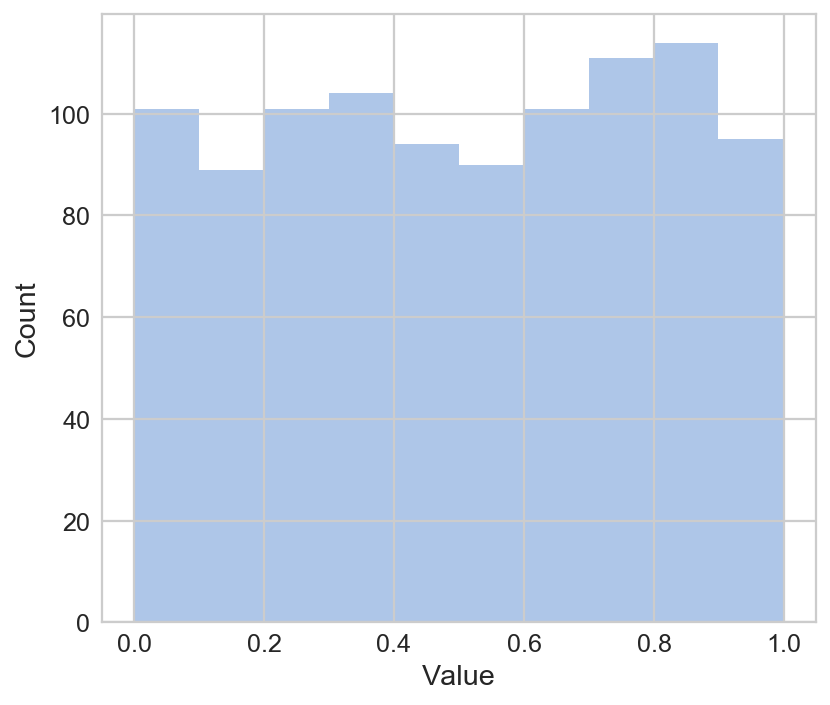

In [9]:
# Delete this
sns.distplot(uniform.rvs(size=1000), kde=False)
plt.ylabel('Count')
plt.xlabel('Value')
plt.show()

#### Normal Distribution

Now create the analagous histogram of a normal distribution with mean of 100 and standard deviation of 15.

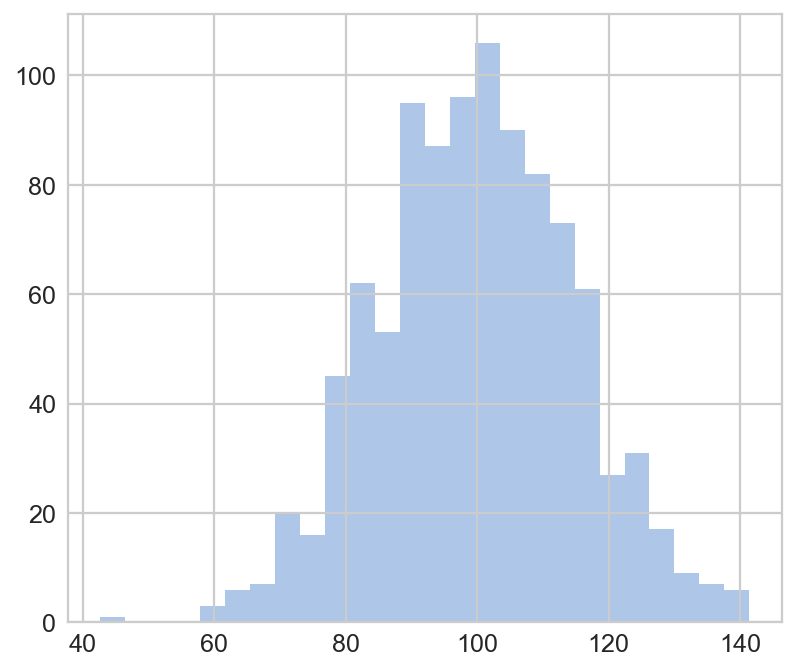

In [10]:
# Delete this
sns.distplot(norm.rvs(loc=100, scale=15, size=1000), kde=False)
plt.show()

#### Poisson Distribution

Now create a histogram of a poisson distribution with mean 4

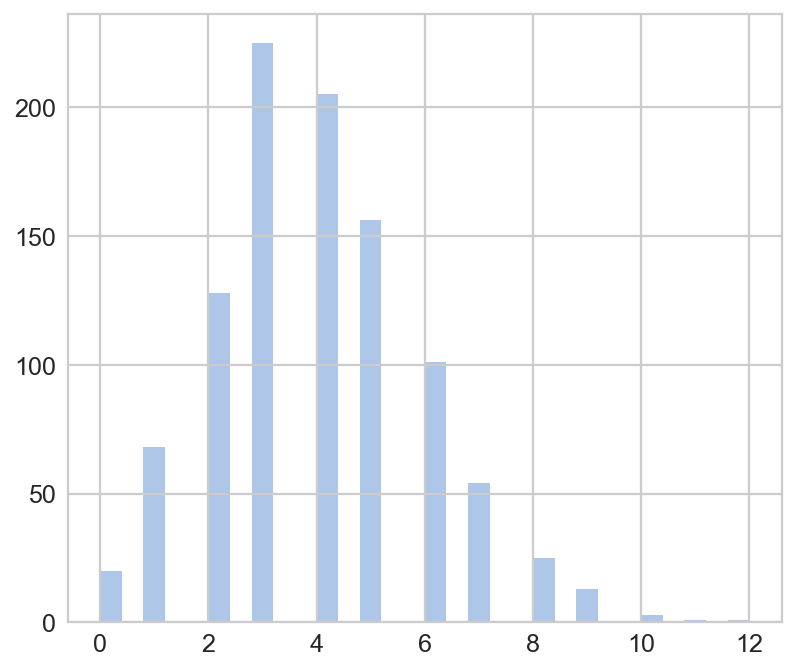

In [11]:
# Delete this
sns.distplot(poisson.rvs(mu=4, size=1000), kde=False)
plt.show()

#### Bernoulli Distribution

Now create a histogram of 1000 samples from a Bernoulli distribution with a probabiliy of 0.5.

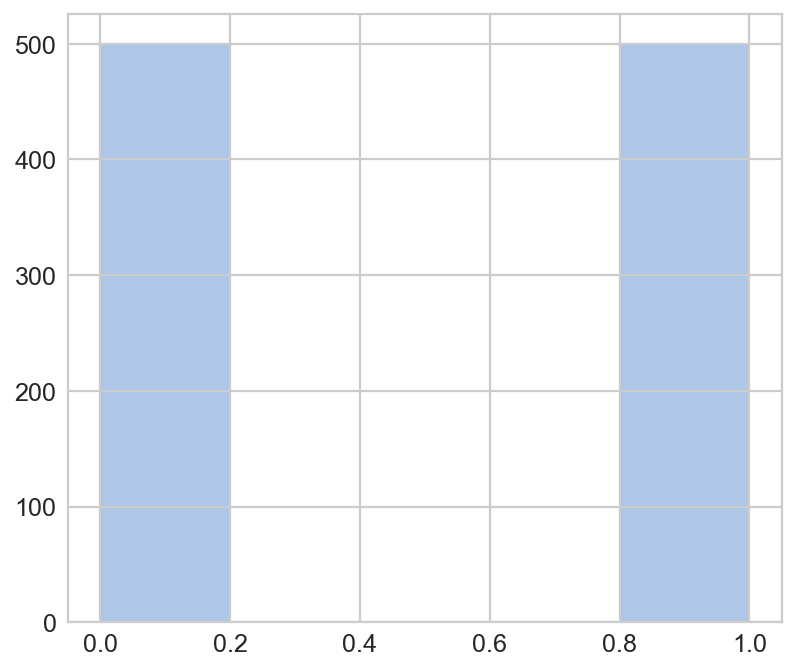

In [14]:
# Delete this
sns.distplot(bernoulli.rvs(p=0.5, size=1000), kde=False)
plt.show()

Can you think which distribution matches each of the data generation processes?

1. Toss of a coin
2. The serial number of any dollar bill chosen at random
3. The number of hurricanes in a given year
4. IQ scores in the general population

# Simulating Data

We are going to simulate idealized age and income data using these distributions. First create an array `age` that has 1000 random samples of a uniform distribution from 0 to 80 (Hint: you can use multiplication to scale the interval you desire). Additionally, create another array, `income`, with 1000 samples from a normal distribution that has a mean of 30 and a standard-deviation of 10 (working in units of 1000s of dollars). 

Make a scatter plot of these two arrays and calculate thier pearsons correlation coefficient and associated p-value - you will need to import this from `scipy.stats`.

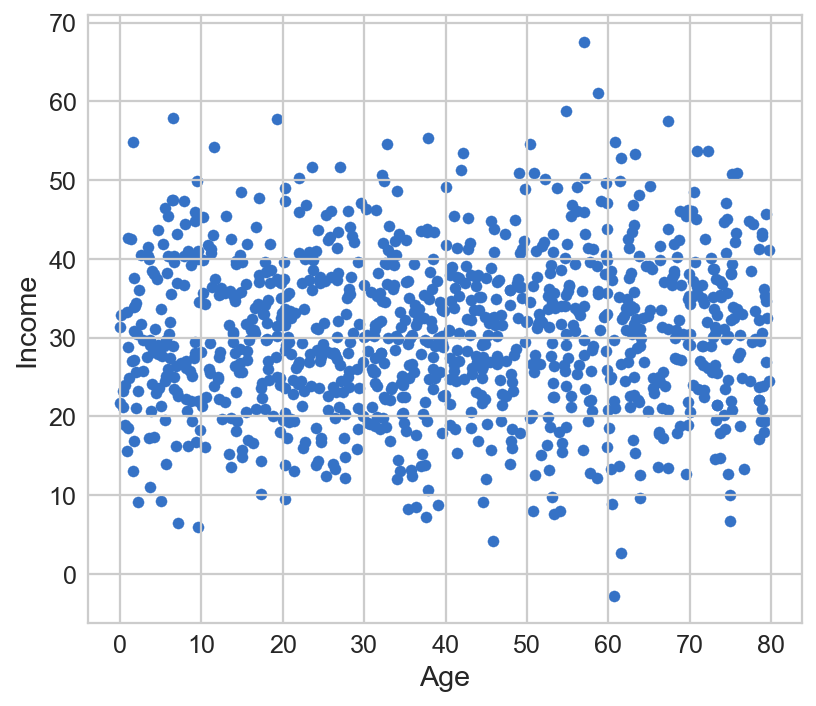

Pearsons correlation coefficient = 0.049 (p=0.120)


In [30]:
# Delete this
from scipy.stats import pearsonr
age = uniform.rvs(size=1000)*80
income = norm.rvs(30, 10, size=1000)
plt.scatter(age, income)
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

print('Pearsons correlation coefficient = %.3f (p=%.3f)' % (pearsonr(age, income)[0], pearsonr(age, income)[1]))

Hopefully you have found that these two arrays are weakly and non-significantly (p>0.05) correlated, this is because the two arrays were created independantly. Next, we are going to look at simulating data in which `income` is related to `age`. In order to do this we will set up `income` so that its mean is no longer a single value but instead is a function of `age`, specifically it is is `0.2*age`. Create the same plot and calcualte the pearson correlation as above with `income` defined in this new way . 

You may also find `np.clip` useful to ensure that you do not gett anyone with negative income. 

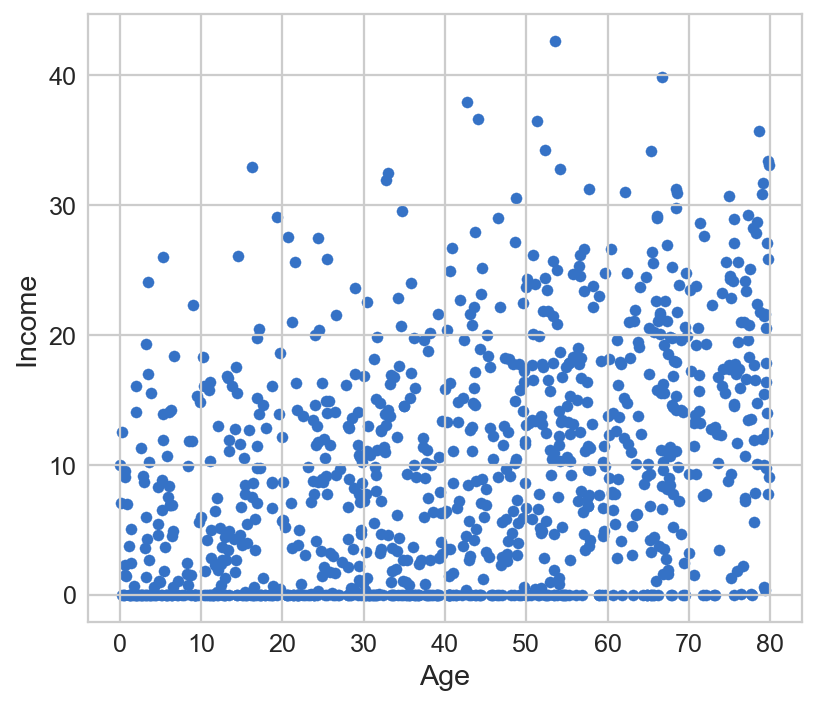

Pearsons correlation coefficient = 0.392 (p=0.000)


In [49]:
# Delete this
age = uniform.rvs(size=1000)*80
income = np.clip(norm.rvs(age*0.2, 10, size=1000), 0, np.inf)
plt.scatter(age, income)
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

print('Pearsons correlation coefficient = %.3f (p=%.3f)' % (pearsonr(age, income)[0], pearsonr(age, income)[1]))

# Ordinary Least Squares

We will now perform ordinary least squares to see if we can recover the coefficient we used to simulate the data. For this we will use the library `statsmodels` (imported below for you). Look at the method `OLS` and by using the example in its documenation see if you can fit a linear model between the arrays `age` and `income` to see if you can recover the coefficient we used to generate the data.

In [50]:
import statsmodels.api as sm

In [55]:
# Delete this
model = sm.OLS(income, age)
results = model.fit()
results.params

Hopefully you would have created an object named `results`, this should have a method called `summary` - you can use this to generate a nice looking table showing various diagnostics of the fit. Try this below.

# Heteroscedasticity

<div class="alert alert-block alert-info">
<b>Definition:</b> Heteroscedasticity is a fancy word for saying the variance of a variable is function of some other variable.
</div>

For ordinary least squares we assume that the variance is __fixed__ and that the mean is some function of another variable, now we are going to look at what happens when this is not the case. We want to create the same plot and pearson correlation we did previously only this time instead of the standard deviation of income being fixed set is a function of age: `0.4*age`

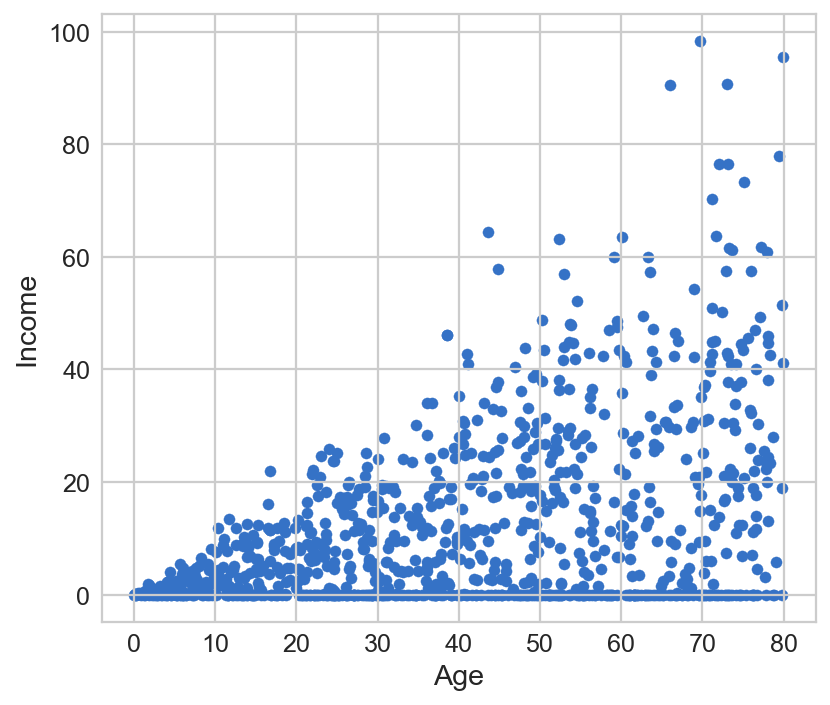

Pearsons correlation coefficient = 0.444 (p=0.000)


In [65]:
age = uniform.rvs(size=1000)*80
income = np.clip(norm.rvs(age*0.2, age*0.4, size=1000), 0, np.inf)
plt.scatter(age, income)
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

print('Pearsons correlation coefficient = %.3f (p=%.3f)' % (pearsonr(age, income)[0], pearsonr(age, income)[1]))

Do you think that this is a more or less realistic situaton for the relationship between age and income than the situation above? Why?

Fit the same ordinary least squares model you did before but now on this new simulated data, what is the new estimated coefficient realting `age` and `income`. 

In [67]:
model = sm.OLS(income, age)
results = model.fit()
results.params

array([0.30402738])

Above we have shown that if data do not fit the assumptions of ordinary least squares (namely fixed variance) it can leave to erroneous results. Simulations are a very useful for developing an understanding and intuition for how statistical systems operate.

<blockquote>
    What I cannot create, I do not understand - <cite>Richard Feynman</cite>
</blockquote>